In [1]:
!pip install -q gradio

In [2]:
import os
import numpy as np
import gradio as gr
import pandas as pd
import tensorflow as tf
import PIL.Image as Image
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [3]:
TF_MODEL_URL = "https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_africa_V1/1"
LABEL_MAP_URL = "https://www.gstatic.com/aihub/tfhub/labelmaps/landmarks_classifier_africa_V1_label_map.csv"
IMAGE_SHAPE = (321, 321)

In [4]:
classifier = tf.keras.Sequential([hub.KerasLayer(
                TF_MODEL_URL,
                input_shape = (*IMAGE_SHAPE, 3 ),
                output_key = "predictions:logits"
)])

2022-05-27 16:57:50.201684: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-05-27 16:57:50.241583: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [5]:
df = pd.read_csv(LABEL_MAP_URL)

In [6]:
df.head()

,id,name
0,0,Auditorio de Tenerife Adán Martín
1,1,Acropolium of Carthage
2,2,Ilheu Mole
3,3,Erg Chebbi
4,4,Museum of Science and the Cosmos


In [7]:
label_map = dict(zip(df.id, df.name))
[(k,v) for k,v in label_map.items()][:5]

[(0, 'Auditorio de Tenerife Adán Martín'),
 (1, 'Acropolium of Carthage'),
 (2, 'Ilheu Mole'),
 (3, 'Erg Chebbi'),
 (4, 'Museum of Science and the Cosmos')]

In [8]:
BASE_DIR = "../input/landmark-images/Images"
test_images = os.listdir(BASE_DIR)

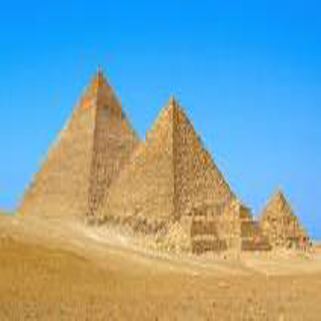

In [9]:
img =  Image.open(BASE_DIR + "/" + test_images[2]).resize(IMAGE_SHAPE)
img

In [10]:
img = np.array(img)/255.0
img.shape

(321, 321, 3)

In [11]:
img = img[np.newaxis, ...]
img.shape

(1, 321, 321, 3)

In [12]:
result = classifier.predict(img)

In [13]:
result.shape

(1, 19293)

In [14]:
label_map[np.argmax(result)]

'Giza Necropolis'

In [15]:
def classify_img(image):
    img = np.array(image)/255.0
    img = img[np.newaxis, ...]
    prediction = classifier.predict(img)
    return label_map[np.argmax(prediction)]

In [16]:
image = gr.inputs.Image(shape=(321, 321))
label = gr.outputs.Label(num_top_classes=1)

gr.Interface(
    classify_img,
    image,
    label,
    capture_session=True
).launch(share=True)

/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://23784.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f1bc112a610>,
 'http://127.0.0.1:7860/',
 'https://23784.gradio.app')